In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv


In [9]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import wordcloud
import pyLDAvis
import pyLDAvis.gensim

from gensim.models import LdaModel, LdaMulticore
from gensim.models import CoherenceModel
from gensim.models import HdpModel

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np 
import pandas as pd

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import random as rn

import re
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [10]:
df = pd.read_csv('../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
df.head(2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2


In [11]:
# None Check #
print("None check:\n{}".format(",".join([df.isnull().columns[idx] + ":" + str(i) for idx, i in enumerate(df.isnull().sum())])))


None check:
Review:0,Rating:0


Text(-2.700000000000003, 0.5, 'Count')

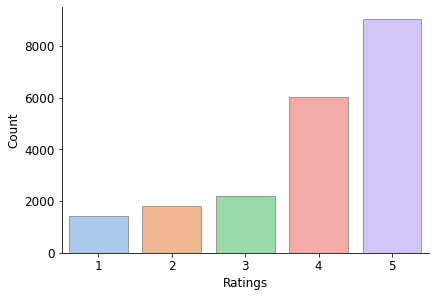

In [12]:
# Rating Distribution #
ax = sn.catplot("Rating", kind="count", palette="pastel", edgecolor=".6", data=df)
plt.gcf().set_size_inches(6, 4)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Preprocessing

In [13]:
df_est=df.copy()
df_est.shape

(20491, 2)

In [14]:
# Create a SpaCy Object #
nlplg = spacy.load('en_core_web_lg')
spacy.displacy.render(nlplg(df_est["Review"][777]), style='ent',jupyter=True)

In [15]:
from spacy.lang.en import English
nlp = English()
def txt_clear(txt):  
    txt = re.sub('[^a-zA-Z-_]+', ' ', str(txt)) 
    doc = nlp(txt)
    return " ".join([WordNetLemmatizer().lemmatize(token.lemma_.lower())\
                     for token in doc if (token.is_stop or token.is_space or len(token.text)<3) == False])

df_est["Review"] = df_est["Review"].apply(txt_clear)

In [16]:
# Create a SpaCy Object #
nlplg = spacy.load('en_core_web_lg')
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
def chunk_clear(txt):
    doc = nlplg(txt)
    return(" ".join([token.text for token in doc if not token.ent_type_]))
df_est["Review"] = df_est["Review"].apply(chunk_clear)


In [17]:
from nltk.tokenize import RegexpTokenizer

docs = np.array(df_est['Review'])
for idx in range(len(docs)):  
    docs[idx]=RegexpTokenizer(r'\w+').tokenize(docs[idx])


In [30]:
spacy.displacy.render(nlplg(df_est["Review"][777]), style='ent',jupyter=True)

/opt/conda/lib/python3.7/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


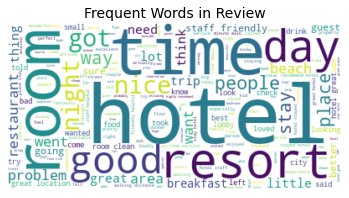

In [19]:
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')\
   .generate(" ".join(df_est["Review"].values))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off") 
plt.title("Frequent Words in Review", size=14)
plt.show()

# LDA Analysis 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


In [21]:
# Initiate the Dictionary for words #.
dictionary = gensim.corpora.Dictionary(docs)
print("Number of words in the dictionary:", len(dictionary))

dictionary.filter_extremes(no_below=10, no_above=0.3)
print('Number of words after filtering uncommon and common words:', len(dictionary))

Number of words in the dictionary: 36783
Number of words after filtering uncommon and common words: 7189


In [22]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

[print(dictionary[i[1]], "appear", i[1], "times") for i in corpus[1]]


anniversary appear 2 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
arrived appear 3 times
anniversary appear 2 times
anniversary appear 2 times
advice appear 1 times
anniversary appear 2 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
arrived appear 3 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
anniversary appear 2 times
anniversary appear 2 times
advice appear 1 times
advice appear 1 times
anniversary appear 2 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
anniversary appear 2 times
anniversary appear 2 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
advice appear 1 times
anniversary appear 2 times
ad

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Baseline LDA Model

In [23]:
ldamodel = LdaModel(corpus=corpus, id2word=dictionary.id2token, num_topics=3, chunksize=500,passes=10,iterations=400,\
                       eval_every=1,random_state=10)


In [55]:
ldamodel.show_topics()

[(0,
  '0.019*"beach" + 0.019*"resort" + 0.018*"pool" + 0.017*"food" + 0.009*"people" + 0.009*"bar" + 0.008*"drink" + 0.008*"like" + 0.008*"water" + 0.008*"beautiful"'),
 (1,
  '0.008*"bed" + 0.007*"desk" + 0.007*"like" + 0.006*"check" + 0.006*"got" + 0.006*"told" + 0.006*"floor" + 0.006*"door" + 0.005*"problem" + 0.005*"asked"'),
 (2,
  '0.009*"walk" + 0.009*"excellent" + 0.009*"friendly" + 0.009*"helpful" + 0.009*"area" + 0.008*"view" + 0.008*"comfortable" + 0.007*"bathroom" + 0.007*"city" + 0.007*"bed"')]

In [25]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=docs, dictionary=dictionary, coherence="c_v")
print("Coherence of this baseline model", coherence_model_lda.get_coherence())

Coherence of this baseline model 0.38729367568438205


# Grid Search

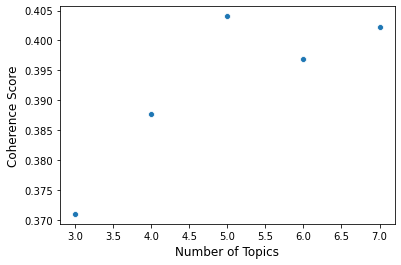

In [36]:
def compute_coherence_values(corpus, dictionary, texts, k):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=k, random_state=10, chunksize=500, \
                             iterations=400,eval_every=1, passes=10, per_word_topics=True, workers=4)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

# Topic range
min_topics = 3
max_topics = 8
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.80)), 
               corpus]
corpus_title = ['80% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Coherence': []
                }

# iterate through validation corpuses
for i in range(1, len(corpus_sets)):
    # iterate through number of topics
    for k in topics_range:
        cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, texts=docs, k=k)
        # Save the model results
        model_results['Validation_Set'].append(corpus_title[i])
        model_results['Topics'].append(k)
        model_results['Coherence'].append(cv)

ax = sn.scatterplot(model_results["Topics"], model_results["Coherence"])
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence Score", fontsize=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.gcf().set_size_inches(6, 4)
plt.show()

In [26]:
ldamodel_best = LdaModel(corpus=corpus, id2word=dictionary.id2token, num_topics=5, passes=10,\
                        random_state=10, chunksize=500,iterations=400,eval_every=1, )
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel_best, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.118300  0.008968       1        1  26.692911
4     -0.063604 -0.256061       2        1  20.727748
2     -0.097331  0.162961       3        1  18.485413
3      0.236439  0.034443       4        1  18.455042
0     -0.193805  0.049689       5        1  15.638886, topic_info=        Term         Freq        Total Category  logprob  loglift
3664   beach  8663.000000  8663.000000  Default  30.0000  30.0000
3638  resort  8644.000000  8644.000000  Default  29.0000  29.0000
949     pool  9298.000000  9298.000000  Default  28.0000  28.0000
412     food  9594.000000  9594.000000  Default  27.0000  27.0000
7        bed  7691.000000  7691.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1144    stop  1113.394164  1893.291053   Topic5  -5.3130   1.3245
465      lot  1387.462234  4814.257278   Topic5  -5.0930   0.6113
27    little  1317.965966  5971.094958   Topic5  -5.1444   0.3446
482    small  1319.025639  6075.566831   Topic5  -5.1436   0.3280
340    floor  1279.608733  5483.876594   Topic5  -5.1739   0.4002

[382 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
388       1  0.040492    access
388       3  0.139474    access
388       5  0.819973    access
319       4  0.999776  activity
7084      3  0.992591   affinia
...     ...       ...       ...
735       1  0.014986      year
735       2  0.041362      year
735       3  0.108499      year
735       4  0.833225      year
735       5  0.001798      year

[728 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])

In [54]:
coherence_model_lda = CoherenceModel(model=ldamodel_best, texts=docs, dictionary=dictionary, coherence="c_v")
print("Coherence of this best model", coherence_model_lda.get_coherence())


Coherence of this best model 0.40692878375895214


In [32]:
def explore_topic(lda_model, topic_number, topn, output=True):
    """
    accept a ldamodel, atopic number and topn vocabs of interest
    prints a formatted list of the topn terms
    """
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [56]:
from pprint import pprint
pprint(ldamodel_best.show_topics())

[(0,
  '0.015*"walk" + 0.014*"area" + 0.012*"free" + 0.011*"price" + 0.010*"street" '
  '+ 0.010*"bus" + 0.009*"view" + 0.009*"station" + 0.009*"internet" + '
  '0.009*"minute"'),
 (1,
  '0.011*"bed" + 0.007*"desk" + 0.007*"check" + 0.007*"got" + 0.007*"floor" + '
  '0.007*"like" + 0.007*"told" + 0.006*"door" + 0.006*"problem" + '
  '0.006*"bathroom"'),
 (2,
  '0.018*"excellent" + 0.014*"friendly" + 0.014*"helpful" + 0.013*"bathroom" + '
  '0.013*"bed" + 0.012*"comfortable" + 0.010*"lovely" + 0.010*"bar" + '
  '0.010*"recommend" + 0.010*"modern"'),
 (3,
  '0.012*"review" + 0.012*"trip" + 0.012*"best" + 0.010*"vacation" + '
  '0.009*"like" + 0.008*"wonderful" + 0.008*"experience" + 0.007*"ocean" + '
  '0.007*"way" + 0.006*"went"'),
 (4,
  '0.029*"beach" + 0.029*"resort" + 0.028*"pool" + 0.024*"food" + 0.013*"bar" '
  '+ 0.012*"drink" + 0.011*"water" + 0.011*"people" + 0.011*"buffet" + '
  '0.008*"beautiful"')]


<Figure size 576x432 with 0 Axes>

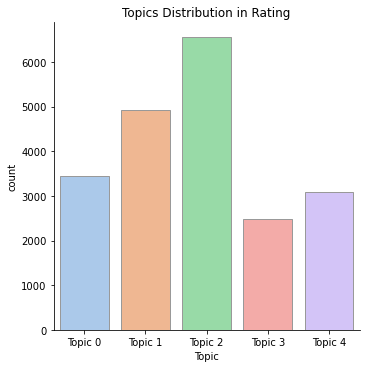

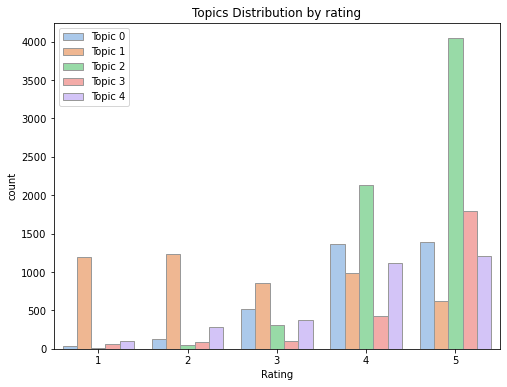

In [53]:
# Include Topics to df_est #
topics = ldamodel_best.get_document_topics(corpus, minimum_probability=0.0)
topics_csr = gensim.matutils.corpus2csc(topics)
topics_numpy = topics_csr.T.toarray()
df_est['Topic'] = topics_numpy.argmax(axis=1)

# Topics Distribution #
plt.gcf().set_size_inches(8, 6)
ax=sn.catplot("Topic", kind="count", palette="pastel", edgecolor=".6",data=df_est)
ax.set_xticklabels(['Topic 0',"Topic 1","Topic 2","Topic 3","Topic 4"])
plt.title('Topics Distribution in Rating',fontsize=12)
plt.show()

# Topic Distribution by Rating #
plt.gcf().set_size_inches(8, 6)
sns.countplot(x="Rating",hue="Topic",palette="pastel", edgecolor=".6",data=df_est)
plt.legend(['Topic 0',"Topic 1","Topic 2","Topic 3","Topic 4"])
plt.title('Topics Distribution by rating',fontsize=12)
plt.show()